<a href="https://colab.research.google.com/github/alextseng69/alextseng69/blob/main/Core_Algorithms1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

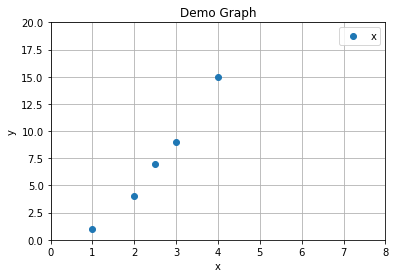

In [ ]:
#Graph Plotting

import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]

plt.plot(x,y, "o")
plt.axis([0,8,0,20])
plt.legend(['x','y'])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Demo Graph")
plt.grid(True)
plt.show()


In [ ]:
!pip install sklearn

In [ ]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf


In [ ]:
#Loading Datasets
dfTrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfTest = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

y_train = dfTrain.pop('survived')
y_eval = dfTest.pop('survived')


In [ ]:
print(y_train)
print(y_train.loc[0])

print(dfTrain)
print(dfTrain.loc[0])

data_first_row = dfTrain.loc[0]
print(data_first_row)

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64
0
        sex   age  n_siblings_spouses  ...     deck  embark_town alone
0      male  22.0                   1  ...  unknown  Southampton     n
1    female  38.0                   1  ...        C    Cherbourg     n
2    female  26.0                   0  ...  unknown  Southampton     y
3    female  35.0                   1  ...        C  Southampton     n
4      male  28.0                   0  ...  unknown   Queenstown     y
..      ...   ...                 ...  ...      ...          ...   ...
622    male  28.0                   0  ...  unknown  Southampton     y
623    male  25.0                   0  ...  unknown  Southampton     y
624  female  19.0                   0  ...        B  Southampton     y
625  female  28.0                   1  ...  unknown  Southampton     n
626    male  32.0                   0  ...  unknown   Queenstown     y

[627

In [ ]:
data_first_row = dfTrain.loc[0]
print(data_first_row)

sex                          male
age                            22
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object


In [ ]:
dfTrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


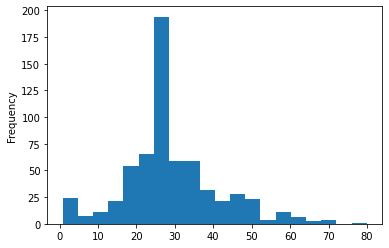

In [ ]:
dfTrain.age.plot.hist(bins=20)

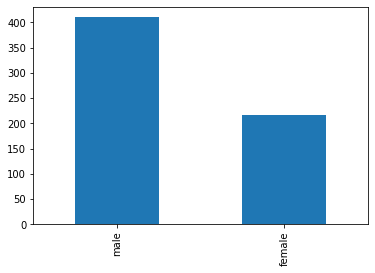

In [ ]:
dfTrain.sex.value_counts().plot(kind= 'bar')

Text(0.5, 0, '% survive')

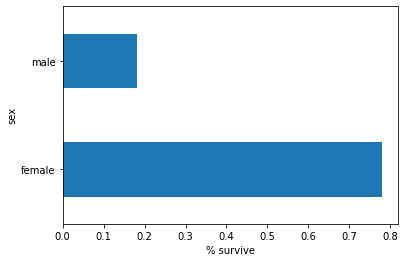

In [ ]:
pd.concat([dfTrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')


In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dfTrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [ ]:
#Feature Columns
feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    print(ds)
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use


In [ ]:
##Model Creation Done!!!

trainInputFn= make_input_fn(dfTrain,y_train)
testInputFn= make_input_fn(dfTest,y_eval,num_epochs=1,shuffle=False)

In [ ]:
linearEstimator = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linearEstimator.train(trainInputFn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpm1jggr8z', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
<TensorSliceDataset shapes: ({sex: (), age: (), n_siblings_spouses: (), parch: (), fare: (), class: (), deck: (), emb

In [ ]:
result = linearEstimator.evaluate(testInputFn)


<TensorSliceDataset shapes: ({sex: (), age: (), n_siblings_spouses: (), parch: (), fare: (), class: (), deck: (), embark_town: (), alone: ()}, ()), types: ({sex: tf.string, age: tf.float64, n_siblings_spouses: tf.int64, parch: tf.int64, fare: tf.float64, class: tf.string, deck: tf.string, embark_town: tf.string, alone: tf.string}, tf.int64)>
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-12T19:14:16Z
INFO:tensorflow:Graph was final

In [ ]:
result
print("Accuracy of the Result ",result["auc"],"%")



Accuracy of the Result  0.83382314 %


In [ ]:
pred_dicts = list(linearEstimator.predict(testInputFn))

<TensorSliceDataset shapes: ({sex: (), age: (), n_siblings_spouses: (), parch: (), fare: (), class: (), deck: (), embark_town: (), alone: ()}, ()), types: ({sex: tf.string, age: tf.float64, n_siblings_spouses: tf.int64, parch: tf.int64, fare: tf.float64, class: tf.string, deck: tf.string, embark_town: tf.string, alone: tf.string}, tf.int64)>
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpm1jg

In [ ]:
#Checking Survival
print(dfTest.loc[0])
print()
print("Actual Survival",y_eval[0])
print(pred_dicts[0]["probabilities"])

sex                          male
age                            35
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object

Actual Survival 0
[0.94779015 0.05220992]


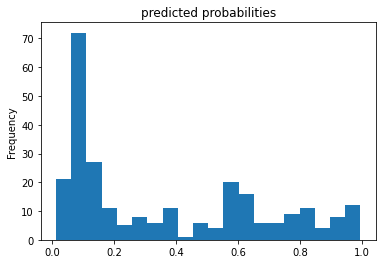

In [ ]:
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities') #Creating Histogram

(0.0, 1.05)

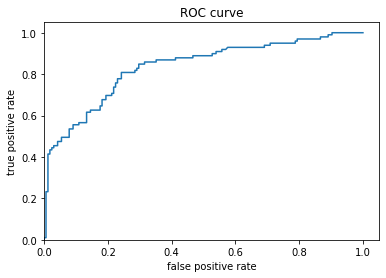

In [ ]:
#Reading From the ROC Curve
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)